In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_excel("RFM_groupby_customerId.xlsx")

In [3]:
df.head()

,Unnamed: 0,Customer ID,Recency,Frequency,MonetaryValue,Cluster_Id,Customer_type
0,0,12346,325,12,77556.46,0,Loyal or Potential
1,1,12347,1,8,4746.73,0,Loyal or Potential
2,2,12348,74,5,1979.40,0,Loyal or Potential
3,3,12349,18,4,4281.46,0,Loyal or Potential
4,4,12350,309,1,291.80,1,Likely to churn


In [4]:
df.shape

(5821, 7)

In [5]:
df.Customer_type.value_counts()

Loyal or Potential    3821
Likely to churn       1978
Can't Loose Them        22
Name: Customer_type, dtype: int64

In [0]:
def cust_churn(x):
    if(x == 'Likely to churn'):
        return 1
    else :
        return 0
df['Cust_churn'] = df['Customer_type'].apply(cust_churn)

In [7]:
df.head()

,Unnamed: 0,Customer ID,Recency,Frequency,MonetaryValue,Cluster_Id,Customer_type,Cust_churn
0,0,12346,325,12,77556.46,0,Loyal or Potential,0
1,1,12347,1,8,4746.73,0,Loyal or Potential,0
2,2,12348,74,5,1979.40,0,Loyal or Potential,0
3,3,12349,18,4,4281.46,0,Loyal or Potential,0
4,4,12350,309,1,291.80,1,Likely to churn,1


In [8]:
df['Cust_churn'].value_counts()/df.shape[0]

0    0.660196
1    0.339804
Name: Cust_churn, dtype: float64

In [0]:
X = df[['Recency','Frequency','MonetaryValue']]
Y = df[['Cust_churn']]

In [10]:
X.shape,Y.shape

((5821, 3), (5821, 1))

In [0]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_std = scaler.transform(X)

In [0]:
X_std_df = pd.DataFrame(X_std) 
X_std_df.columns=['R','F','M']

In [0]:
from sklearn.naive_bayes import GaussianNB
model_Gaus = GaussianNB()

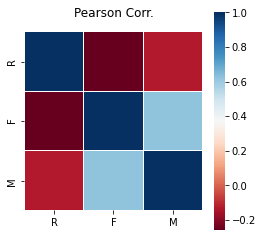

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(4,4))
plt.title('Pearson Corr.', y=1.05, size=12)
sns.heatmap(X_std_df.astype(float).corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_std,Y,cv=4)

array([0.90728022, 0.90171821, 0.90515464, 0.89896907])

In [16]:
from sklearn.model_selection import GridSearchCV
clf_NB = GridSearchCV(GaussianNB(),{},cv=4, return_train_score=False,)
clf_NB.fit(X_std,Y)
clf_NB.cv_results_
results = pd.DataFrame(clf_NB.cv_results_)
results[['mean_test_score']]

,mean_test_score
0,0.903281


In [17]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
clf_LR = GridSearchCV(LogisticRegression(),{'C':[1,5,10],'class_weight':[None,'balanced'],
                                         'solver':['newton-cg','lbfgs','liblinear'] 

}, cv=4, return_train_score=False)
clf_LR.fit(X_std,Y)
clf_LR.cv_results_
results2 = pd.DataFrame(clf_LR.cv_results_)
results2[['param_C','param_class_weight','param_solver','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_C,param_class_weight,param_solver,mean_test_score
8,5,None,liblinear,0.999313
12,10,None,newton-cg,0.999141
2,1,None,liblinear,0.999141
14,10,None,liblinear,0.999141
6,5,None,newton-cg,0.999141
7,5,None,lbfgs,0.999141
13,10,None,lbfgs,0.999141
0,1,None,newton-cg,0.998797
1,1,None,lbfgs,0.998797
16,10,balanced,lbfgs,0.996736


In [18]:
from sklearn import svm

clf_svc = GridSearchCV(svm.SVC(gamma='auto'),{'C': [0.1,1],'kernel': ['rbf','linear']
                      }, cv=4, return_train_score=False)
clf_svc.fit(X_std,Y)
clf_svc.cv_results_
results2 = pd.DataFrame(clf_svc.cv_results_)
results2[['param_C','param_kernel','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_C,param_kernel,mean_test_score
3,1,linear,0.999141
1,0.1,linear,0.998969
2,1,rbf,0.998454
0,0.1,rbf,0.997079


In [19]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = GridSearchCV(RandomForestClassifier(),{'criterion': ['gini','entropy'],'class_weight':[None,'balanced'],'n_estimators':[50,100,200]
                      }, cv=4, return_train_score=False)
clf_rf.fit(X_std,Y)
clf_rf.cv_results_
results2 = pd.DataFrame(clf_rf.cv_results_)
results2[['param_criterion','param_class_weight','param_n_estimators','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_criterion,param_class_weight,param_n_estimators,mean_test_score
0,gini,None,50,0.998110
1,gini,None,100,0.998110
7,gini,balanced,100,0.997939
9,entropy,balanced,50,0.997939
2,gini,None,200,0.997939
4,entropy,None,100,0.997939
5,entropy,None,200,0.997939
8,gini,balanced,200,0.997939
10,entropy,balanced,100,0.997939
11,entropy,balanced,200,0.997939


In [20]:
model = RandomForestClassifier(random_state=10)
model.fit(X_std,Y)
model.score(X_std,Y)

1.0

In [21]:
feature_importances_rf = pd.DataFrame(model.feature_importances_, index = X_std_df.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rf

,importance
R,0.827473
F,0.103327
M,0.069200


In [22]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = GridSearchCV(DecisionTreeClassifier(),
                   {'criterion': ['gini','entropy'],'class_weight':[None,'balanced']
                      }, cv=4, return_train_score=False)
clf_dt.fit(X_std,Y)
clf_dt.cv_results_
results2 = pd.DataFrame(clf_dt.cv_results_)
results2[['param_criterion','param_class_weight',
          'mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_criterion,param_class_weight,mean_test_score
2,gini,balanced,0.997423
3,entropy,balanced,0.996908
0,gini,None,0.996564
1,entropy,None,0.996221


In [106]:
clf_dtree = DecisionTreeClassifier(class_weight='balanced', max_depth=10)

cross_val_score(clf_dtree, X_std,Y,cv=4,scoring='accuracy').mean()

0.9970795098372418

In [108]:
clf_dtree.fit(X_std,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
from xgboost import XGBClassifier

xgb_boost = XGBClassifier()

clf_xgb = GridSearchCV(xgb_boost,{ "eta" : [0.05,0.1,0.2] ,"max_depth": [3,5,10], 
                                  "gamma": [0.0,0.2,0.4]},cv=4, return_train_score=False,)
clf_xgb.fit(X_std,Y)
clf_xgb.cv_results_
results = pd.DataFrame(clf_xgb.cv_results_)
results[['param_eta','param_max_depth','param_gamma','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_eta,param_max_depth,param_gamma,mean_test_score
0,0.05,3,0,0.997939
14,0.1,10,0.2,0.997939
25,0.2,5,0.4,0.997939
24,0.2,3,0.4,0.997939
23,0.2,10,0.2,0.997939
22,0.2,5,0.2,0.997939
21,0.2,3,0.2,0.997939
20,0.2,10,0,0.997939
19,0.2,5,0,0.997939
18,0.2,3,0,0.997939


In [24]:
model_xgb = XGBClassifier(random_state=10)
model_xgb.fit(X_std,Y)
model_xgb.score(X_std,Y)

1.0

In [25]:
feature_importances_xgb = pd.DataFrame(model_xgb.feature_importances_, index = X_std_df.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances_xgb

,importance
R,0.954396
F,0.029064
M,0.016540


## Testing new dataset

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
 data = pd.read_excel("rfm_test_data1.xlsx")

In [28]:
data.drop(columns=['R_Quartile','F_Quartile','M_Quartile']).head()

,customer_id,Recency,Frequency,Monetary_value,Churn
0,CS1112,61,15,1012,0
1,CS1113,35,20,1490,0
2,CS1114,32,19,1432,0
3,CS1115,11,22,1659,0
4,CS1116,203,13,857,1


In [29]:
data.Churn.value_counts()/6889

0    0.826535
1    0.173465
Name: Churn, dtype: float64

In [0]:
X = data[['Recency','Frequency','Monetary_value']]
Y_test = data['Churn']

In [0]:
scaler = preprocessing.StandardScaler().fit(X)
X_test_std = scaler.transform(X)

In [69]:
X_test_std.shape

(6889, 3)

In [74]:
X_test_std_df = pd.DataFrame(X_test_std) 
X_test_std_df.columns=['Recency','Frequency','Monetary_value']
X_test_std_df.head()

,Recency,Frequency,Monetary_value
0,-0.228849,-0.605640,-0.359103
1,-0.533383,0.357262,0.667091
2,-0.568521,0.164682,0.542574
3,-0.814491,0.742423,1.029909
4,1.434376,-0.990801,-0.691865


In [0]:

NB_test=clf_NB.predict(X_test_std)

In [34]:
y_true = Y_test
y_pred = NB_test
target_names = ['class 0', 'class 1']

print(classification_report(y_true, y_pred, target_names=target_names))
print("Naive Bayes model accuracy : ",clf_NB.score(X_test_std,Y_test))

              precision    recall  f1-score   support

     class 0       0.89      0.95      0.92      5694
     class 1       0.64      0.43      0.51      1195

    accuracy                           0.86      6889
   macro avg       0.76      0.69      0.72      6889
weighted avg       0.84      0.86      0.85      6889

Naive Bayes model accuracy :  0.8584700246770214


In [0]:
cm_nb = confusion_matrix(y_true,y_pred)

Text(6.0, 0.5, 'Truth')

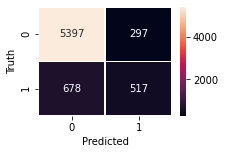

In [36]:
plt.figure(figsize = (3,2))
sns.heatmap(cm_nb,annot=True,fmt='d',linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

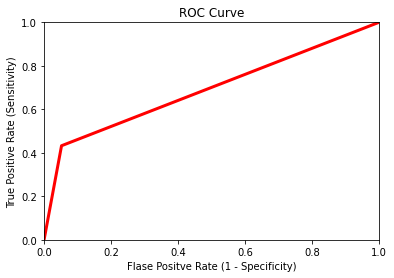

AUC score :  0.6902379073325368


In [38]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC Curve")
plt.xlabel("Flase Positve Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.plot(fpr,tpr,color='red',lw=3)
plt.show()
print("AUC score : ",roc_auc_score(y_true, y_pred))

In [0]:
LR_test = clf_LR.predict(X_test_std)

In [40]:
y_pred1 = LR_test
print(classification_report(y_true, y_pred1, target_names=target_names))
print("Logistic Regression model accuracy : ",clf_LR.score(X_test_std,Y_test))

              precision    recall  f1-score   support

     class 0       1.00      0.88      0.94      5694
     class 1       0.64      1.00      0.78      1195

    accuracy                           0.90      6889
   macro avg       0.82      0.94      0.86      6889
weighted avg       0.94      0.90      0.91      6889

Logistic Regression model accuracy :  0.9015822325446364


Text(6.0, 0.5, 'Truth')

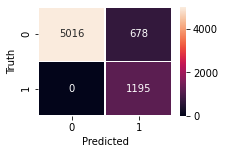

In [41]:
cm_LR = confusion_matrix(y_true,y_pred1)

plt.figure(figsize = (3,2))
sns.heatmap(cm_LR,annot=True,fmt='d',linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [0]:
SVC_test = clf_svc.predict(X_test_std)

In [43]:
y_pred2 = SVC_test
print(classification_report(y_true, y_pred2, target_names=target_names))
print("Support Vector Classification model accuracy : ",clf_svc.score(X_test_std,Y_test))

              precision    recall  f1-score   support

     class 0       1.00      0.88      0.94      5694
     class 1       0.64      1.00      0.78      1195

    accuracy                           0.90      6889
   macro avg       0.82      0.94      0.86      6889
weighted avg       0.94      0.90      0.91      6889

Support Vector Classification model accuracy :  0.9007112788503411


Text(6.0, 0.5, 'Truth')

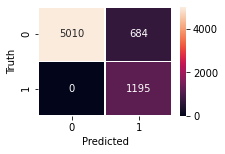

In [44]:
cm_svc = confusion_matrix(y_true,y_pred2)

plt.figure(figsize = (3,2))
sns.heatmap(cm_svc,annot=True,fmt='d',linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [0]:
Ran_forest_test = clf_rf.predict(X_test_std)

In [46]:
y_pred3 = Ran_forest_test
print(classification_report(y_true, y_pred3, target_names=target_names))
print("Random forest model accuracy : ",clf_rf.score(X_test_std,Y_test))

              precision    recall  f1-score   support

     class 0       1.00      0.89      0.94      5694
     class 1       0.66      1.00      0.80      1195

    accuracy                           0.91      6889
   macro avg       0.83      0.95      0.87      6889
weighted avg       0.94      0.91      0.92      6889

Random forest model accuracy :  0.9123239947742778


Text(6.0, 0.5, 'Truth')

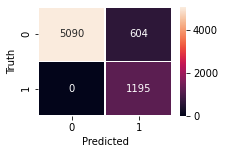

In [47]:
cm_rf = confusion_matrix(y_true,y_pred3)

plt.figure(figsize = (3,2))
sns.heatmap(cm_rf,annot=True,fmt='d',linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [0]:
decision_tree_test = clf_dt.predict(X_test_std)

In [49]:
y_pred4 = decision_tree_test
print(classification_report(y_true, y_pred4, target_names=target_names))
print("Decision tree model accuracy : ",clf_dt.score(X_test_std,Y_test))

              precision    recall  f1-score   support

     class 0       1.00      0.90      0.95      5694
     class 1       0.67      1.00      0.81      1195

    accuracy                           0.92      6889
   macro avg       0.84      0.95      0.88      6889
weighted avg       0.94      0.92      0.92      6889

Decision tree model accuracy :  0.9163884453476557


Text(6.0, 0.5, 'Truth')

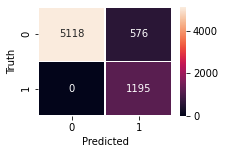

In [50]:
cm_dt = confusion_matrix(y_true,y_pred4)

plt.figure(figsize = (3,2))
sns.heatmap(cm_dt,annot=True,fmt='d',linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_test_std_df.columns[0:])
features

['Recency', 'Frequency', 'Monetary_value']

In [0]:
predictions = clf_dtree.predict(X_test_std)

In [110]:
print(classification_report(y_true,predictions))

print(confusion_matrix(y_true,predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      5694
           1       0.67      1.00      0.80      1195

    accuracy                           0.92      6889
   macro avg       0.84      0.95      0.88      6889
weighted avg       0.94      0.92      0.92      6889

[[5114  580]
 [   0 1195]]


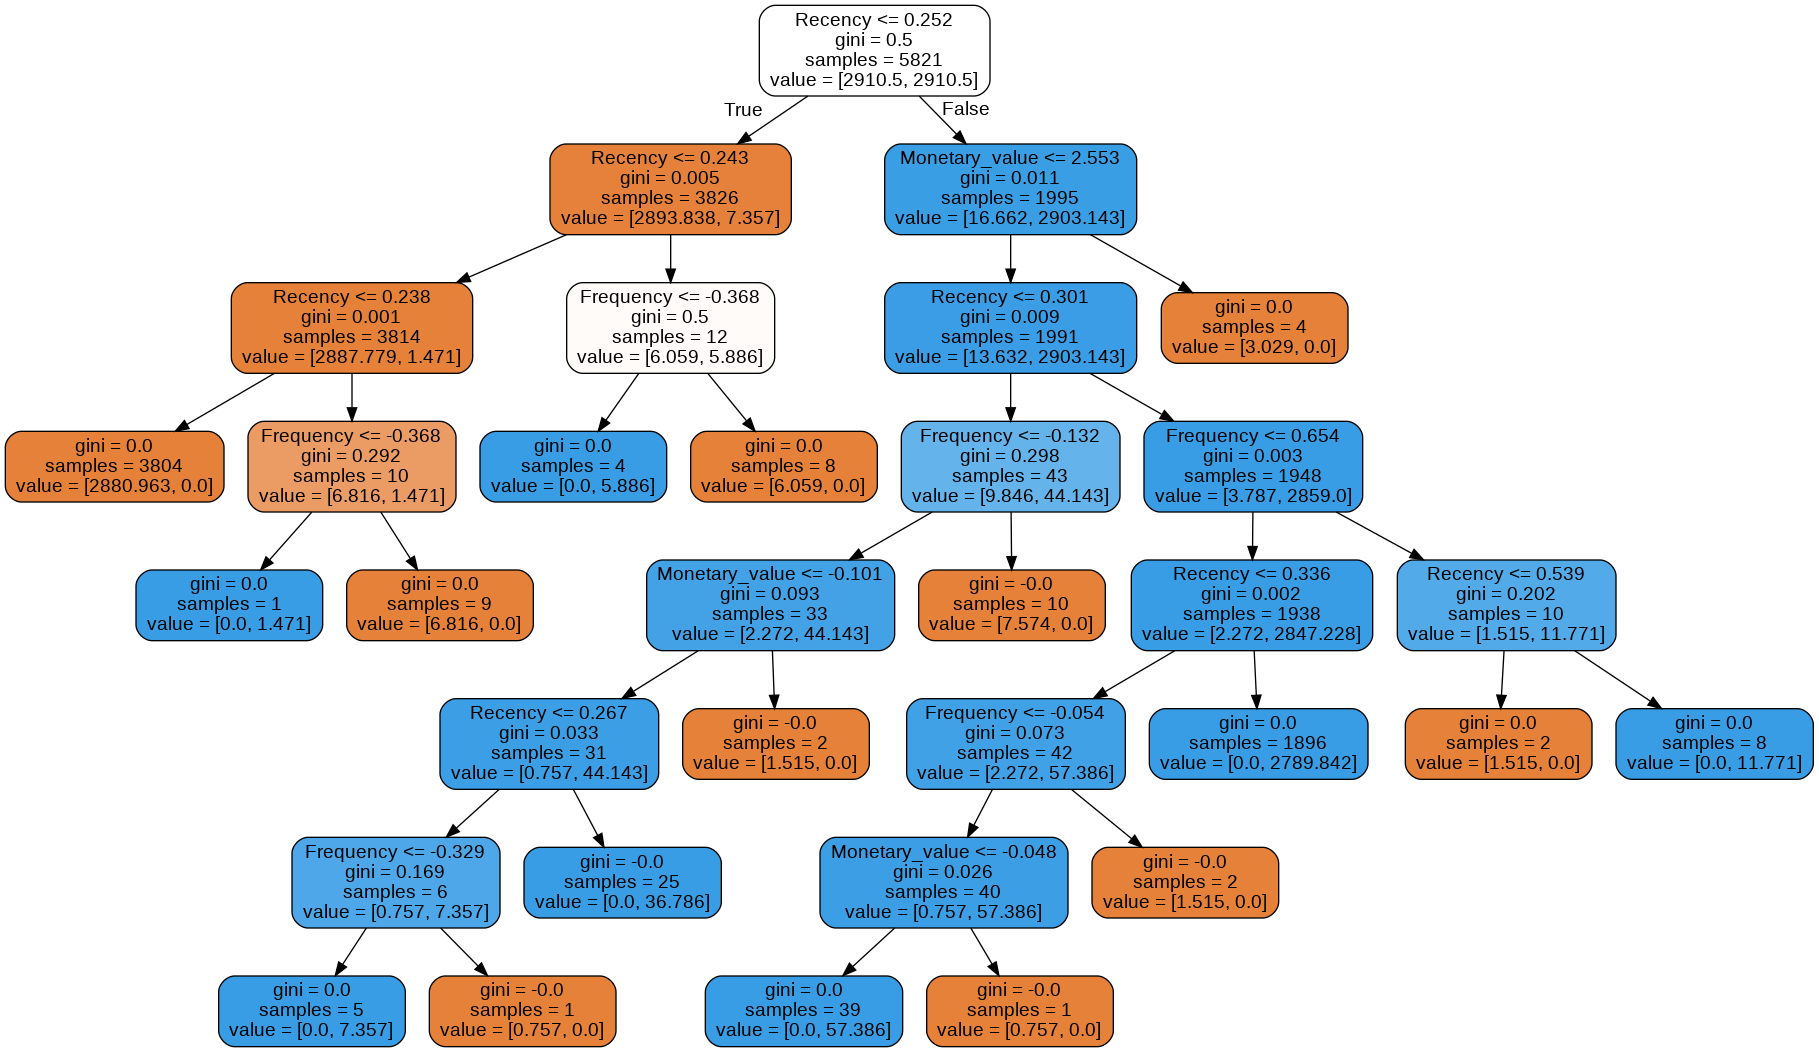

In [111]:
dot_data = StringIO()  
export_graphviz(clf_dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [0]:
XGB_tree_test = clf_xgb.predict(X_test_std)

In [52]:
y_pred5 = XGB_tree_test
print(classification_report(y_true, y_pred5, target_names=target_names))
print("Decision tree model accuracy : ",clf_xgb.score(X_test_std,Y_test))

              precision    recall  f1-score   support

     class 0       1.00      0.90      0.95      5694
     class 1       0.68      1.00      0.81      1195

    accuracy                           0.92      6889
   macro avg       0.84      0.95      0.88      6889
weighted avg       0.95      0.92      0.93      6889

Decision tree model accuracy :  0.9195819422267383


Text(6.0, 0.5, 'Truth')

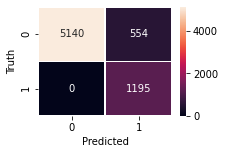

In [53]:
cm_xgb = confusion_matrix(y_true,y_pred5)

plt.figure(figsize = (3,2))
sns.heatmap(cm_xgb,annot=True,fmt='d',linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [0]:
models = [
          {'label': 'Naive Bayes','model': y_pred},
          {'label': 'Logistic Regression','model': y_pred1},
          {'label': 'SVC','model': y_pred2},
          {'label': 'Random forest','model': y_pred3},
          {'label': 'Decision tree','model': y_pred4},
          {'label': 'XGBoost','model': y_pred5},
      ]

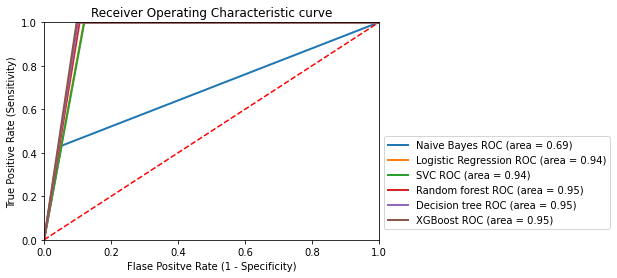

In [55]:
for m in models:
    y_predicted = m['model'] # select the predicted y
  
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_true,y_predicted)
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_true,y_predicted)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc),lw=2)
# Custom settings for the plot 


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Flase Positve Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="best",bbox_to_anchor=(1, 0.5))
plt.show()   

In [0]:
from sklearn.metrics import precision_recall_curve,average_precision_score

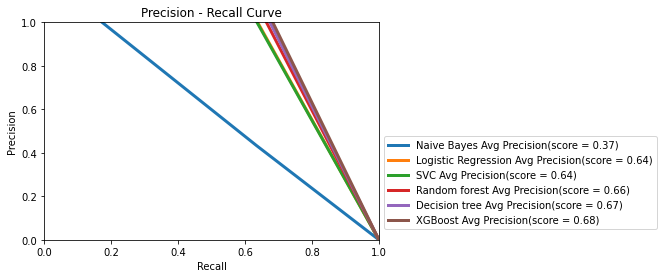

In [57]:
for m in models:
    y_predicted = m['model'] # select the predicted y
  
# Compute False postive rate, and True positive rate
    precision, recall, thresholds = precision_recall_curve(y_true,y_predicted)
# Calculate Area under the curve to display on the plot
    prs = average_precision_score(y_true,y_predicted)
# Now, plot the computed values
    plt.plot(precision, recall, label='%s Avg Precision(score = %0.2f)' % (m['label'], prs),lw=3)
# Custom settings for the plot 



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall Curve')
plt.legend(loc="best",bbox_to_anchor=(1, 0.5))
plt.show()   

In [0]:
data_test = np.array([NB_test,LR_test,SVC_test,Ran_forest_test,decision_tree_test,XGB_tree_test])

In [59]:
data_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [60]:
data_test[0]

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
df_test = pd.DataFrame({'Naive_Bayes': data_test[0], 'Log_Reg': data_test[1], 'SVC':data_test[2], 
                        'Ran_forest':data_test[3],'Decision_tree':data_test[4],'XGBoost':data_test[5]})

In [62]:
df_test.head()

,Naive_Bayes,Log_Reg,SVC,Ran_forest,Decision_tree,XGBoost
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,1


In [63]:
df_test.shape

(6889, 6)

In [0]:
df_test['customer_id'] = data['customer_id']

In [65]:
df_test.head()

,Naive_Bayes,Log_Reg,SVC,Ran_forest,Decision_tree,XGBoost,customer_id
0,0,0,0,0,0,0,CS1112
1,0,0,0,0,0,0,CS1113
2,0,0,0,0,0,0,CS1114
3,0,0,0,0,0,0,CS1115
4,1,1,1,1,1,1,CS1116


In [66]:
final_results = pd.merge(data,df_test,on='customer_id', how='inner')
final_results.head()

,customer_id,Recency,Frequency,Monetary_value,R_Quartile,F_Quartile,M_Quartile,Churn,Naive_Bayes,Log_Reg,SVC,Ran_forest,Decision_tree,XGBoost
0,CS1112,61,15,1012,3,3,3,0,0,0,0,0,0,0
1,CS1113,35,20,1490,2,2,2,0,0,0,0,0,0,0
2,CS1114,32,19,1432,2,2,2,0,0,0,0,0,0,0
3,CS1115,11,22,1659,1,2,1,0,0,0,0,0,0,0
4,CS1116,203,13,857,4,4,3,1,1,1,1,1,1,1


In [0]:
final_results.to_excel("final_Test_results.xlsx")